In [79]:
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams['svg.fonttype'] = 'none'

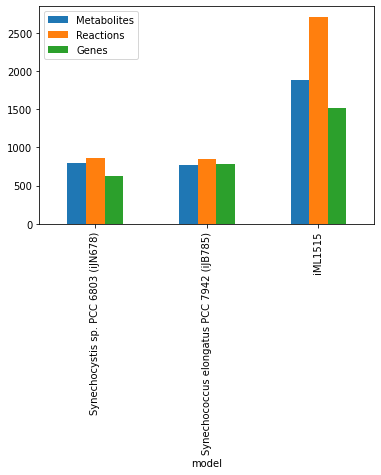

In [10]:
pd.read_csv('templateRhodo.csv',index_col=0).plot.bar()
plt.savefig('template_bar.svg',format='SVG')

In [11]:
pd.read_csv('templateRhodo.csv',index_col=0)

,Metabolites,Reactions,Genes
model,,,
Synechocystis sp. PCC 6803 (iJN678),795,863,622
Synechococcus elongatus PCC 7942 (iJB785),768,849,785
iML1515,1877,2712,1516


In [1]:
import cobra

/home/jt/me_modeling/lib/python3.6/site-packages/cobra-0.5.11-py3.6-linux-x86_64.egg/cobra/io/sbml3.py:24: UserWarning: Install lxml for faster SBML I/O
  warn("Install lxml for faster SBML I/O")
/home/jt/me_modeling/lib/python3.6/site-packages/cobra-0.5.11-py3.6-linux-x86_64.egg/cobra/io/__init__.py:12: UserWarning: cobra.io.sbml requires libsbml
  warn("cobra.io.sbml requires libsbml")


In [2]:
model = cobra.io.read_sbml_model('modelFixedFinal.xml')

cobra/io/sbml3.py:343 UserWarning: ignoring invalid geneAssocation for <Reaction DESAT18a at 0x7fb0a45c7b38>
cobra/io/sbml3.py:343 UserWarning: ignoring invalid geneAssocation for <Reaction GCATENEC at 0x7fb0a45e7128>
cobra/io/sbml3.py:343 UserWarning: ignoring invalid geneAssocation for <Reaction 5DOAN at 0x7fb0a45e7da0>
cobra/io/sbml3.py:343 UserWarning: ignoring invalid geneAssocation for <Reaction Htex at 0x7fb0a45e7f60>
cobra/io/sbml3.py:343 UserWarning: ignoring invalid geneAssocation for <Reaction CHRPL at 0x7fb0a4627e10>
cobra/io/sbml3.py:343 UserWarning: ignoring invalid geneAssocation for <Reaction ADCL at 0x7fb0a45d3780>
cobra/io/sbml3.py:343 UserWarning: ignoring invalid geneAssocation for <Reaction AOXPBDC at 0x7fb0a45d3a58>
cobra/io/sbml3.py:343 UserWarning: ignoring invalid geneAssocation for <Reaction ADPT at 0x7fb0a4627d30>
cobra/io/sbml3.py:343 UserWarning: ignoring invalid geneAssocation for <Reaction DHNANT at 0x7fb0a4627e80>
cobra/io/sbml3.py:343 UserWarning: ignor

In [4]:
model.metabolites[100].formula_weight

40.078

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
[len(model.metabolites),len(model.reactions),len(model.genes)]

[2081, 2655, 1282]

In [11]:
9.1 /1877 * np.array([len(model.metabolites),len(model.reactions),len(model.genes)])

array([10.08902504, 12.87187001,  6.21534363])

In [13]:
model

<Model COBRAModel at 0x7fb036d36128>

In [27]:
# biomass = pd.read_excel('newBiomass.xlsx',sheet_name=None,index_col=0,header=None)

In [65]:
biomass = pd.read_excel('newBiomass.xlsx',sheet_name='BIOMASS__1',index_col=0,header=None)

/home/jt/me_modeling/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1547 MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 


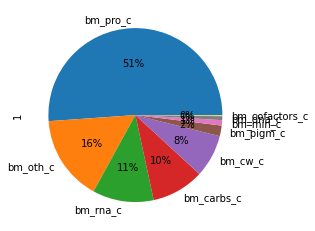

In [84]:
biomass[(biomass[1]<0)&(biomass[1]>-1)][1].abs().sort_values(ascending=False).plot.pie(autopct='%1.0f%%')
plt.savefig('biomass_pie.svg',format='SVG')

In [59]:
contribution = {}
for k,df in biomass.items():
    if 'Biomass' not in k:continue
    group = k.split('Biomass_')[1]
    
    for met,row in df.iterrows():
        mw = model.metabolites.get_by_id(met+'_u').formula_weight
        coeff = row[1]
        if coeff > 0: continue
        if not mw:
            print(met,model.metabolites.get_by_id(met+'_u').formula)
            continue
        
        d = {
            'group':group,
            'mw':mw,
            'coeff':coeff,
            'contribution':-mw*coeff
        }
        contribution[met] = d

glycogen_c C12H21O10R
14glucan_c C6H11O5R


In [61]:
biomass_df = pd.DataFrame.from_dict(contribution).T

In [64]:
biomass_df[biomass_df['group'] == 'Protein'].sum()

group           ProteinProteinProteinProteinProteinProteinProt...
mw                                                        2756.02
coeff                                                    -31.7822
contribution                                              1083.67
dtype: object